# Question Prompt

Product would like to figure out if it'd be viable to offer customers a feature which predicts whether or not 
a person will get diabetes.  Your task is to make a recommendation (with justifications) as to whether or not we 
should pursue this as a business, as well as give an idea of what additional work is required and how long it would 
take.

Product would like the following deliverables:
- recommendation with justifications
- Jupyter notebook with work done to land at the recommendation 
- description of any additional work required and how long it would take
- Bonus #1: describe how you would take your work to production (i.e. have your work in a form consumable by customers)
- Bonus #2: working prototype of what your production-ready project would resemble that we can run on our laptops

Dataset to be used is attached.

# To start:

- We need to check against the data as to whether we need to do any treatment
- Then we need to figure out if a model will perform reasonably well against the sampled data
- In the first trial, I will be running the model against an ANN classification model as I've worked with ANN in the past and it achieved a very high accuracy and good performance.

# Step 1 Import Data

In [4]:
# Part 1 - Loading data and data cleaning
# Loading dataset
import numpy as np
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('diabetes.csv')
        
# Replace with average age
X = dataset.iloc[:, 0:8].values
y = dataset.iloc[:, 8].values

# Step 2 Check the nature of the data

In [5]:
# Part 1 - collect data stats
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Part 2 - check correlation of data
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Should we even attempt to model?

Alternatively, we need to ask whether the occurance of diabetes is simply random.

To answer that, because the outcome has some moderate correlation with the features -- namely glucose and BMI -- it is possible to have a model to predict the outcome of positive or negative for diabetes

In [7]:
# Part 3 - Check the nature of data
dataset.groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


Since the data has 500 negatives and 268 positives (35% positive, 65% negative), we don't really issue with unbalanced
data. Hence we would not need to have upsampling or downsampling or bootstrapping.

# Step 3 Divide data into train and test

In [47]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [4]:
# Part 2 - Build model / Parameter Tuning using GridSearch
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Keras classifier wrapper
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
def build_classifier(optimizer):
    # Initialize ANN
    classifier = Sequential()

    # First hidden layer with 10% dropout
    classifier.add(Dense(activation="relu", input_dim=8, units=4, kernel_initializer="uniform"))
    classifier.add(Dropout(rate=0.3))

    # The second hidden layer with 10% dropout
    classifier.add(Dense(activation="relu", units=4, kernel_initializer="uniform"))
    classifier.add(Dropout(rate=0.3))

    # Adding the output layer
    classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

    # Compiling the ANN
    classifier.compile(
        optimizer=optimizer, # efficient SGD
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return classifier

In [6]:
classifier = KerasClassifier(build_fn=build_classifier)

# Create a dict of hyperparameters to optimize
parameters = {
    # Tune batch size, epoch, optimizer
    'batch_size': [25, 32],
    'nb_epoch': [100, 200, 300],
    'optimizer': ['adam', 'rmsprop']
}

# Implement GridSearch
grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=parameters,
    scoring='accuracy',
    cv=10
)

# Fit gridsearch to training set
grid_search = grid_search.fit(
    X_train,
    y_train
)

# Capture best param and accuracy
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/1
518/518 [==============================] - 0s 875us/step - loss: 0.6919 - acc: 0.6351
Epoch 1/1
518/518 [==============================] - 1s 974us/step - loss: 0.6917 - acc: 0.6429
Epoch 1/1
518/518 [==============================] - 1s 984us/step - loss: 0.6920 - acc: 0.6371
Epoch 1/1
518/518 [==============================] - 1s 1ms/step - loss: 0.6913 - acc: 0.6544
Epoch 1/1
518/518 [==============================] - 1s 1ms/step - loss: 0.6920 - acc: 0.6390
Epoch 1/1
518/518 [==============================] - 1s 1ms/step - loss: 0.6919 - acc: 0.6486
Epoch 1/1
519/519 [==============================] - 1s 2ms/step - loss: 0.6918 - acc: 0.6416
Epoch 1/1
519/519 [==============================] - 1s 2ms/step - loss: 0.6918 - acc: 0.6435
Epoch 1/1
519/519 [==============================] - 1s 2ms/step - loss: 0.6917 - acc: 0.6281
Epoch 1/1
519/519 [==============================] - 1s 1ms/step - loss: 0.6920 - acc: 0.6358
Epoch 1/1
518/518 [==============================] - 1

In [40]:
# Print best accuracy
print(best_parameters)
print(best_accuracy)

{'batch_size': 25, 'nb_epoch': 100, 'optimizer': 'adam'}
0.6423611111111112


In [41]:
# Part 3 - Making the prediction and print accuracy
y_pred = grid_search.predict(X_test)

# If y_pred is > 0.5 then true, else false
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[130   0]
 [ 62   0]]


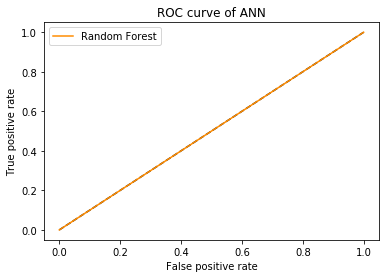

In [42]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from matplotlib import pyplot as plt
false_positive, true_positive, _ = roc_curve(y_test, y_pred)

plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_positive, true_positive, color='darkorange', label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of ANN')
plt.legend(loc='best')
plt.show()

The model has a lot of false negatives.

# Second trial to run a different model -- random forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [44]:
clf = RandomForestClassifier(max_depth=8, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=8, max_features='auto', 
                       max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, 
                       min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, oob_score=False, 
                       random_state=0, verbose=0, warm_start=False)

print(clf.feature_importances_)

# Make prediction
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[0.06068193 0.25207992 0.07821236 0.07956198 0.06927419 0.15830138
 0.10792756 0.19396068]
[[110  20]
 [ 24  38]]


In this case we can get an accuracy of 77% defined as sum(diagonal) / sum(all elements in matrix)

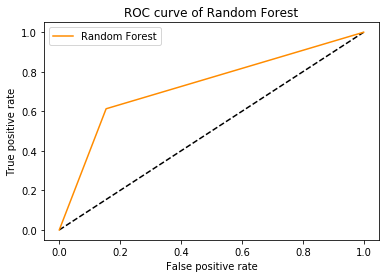

In [45]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from matplotlib import pyplot as plt
false_positive, true_positive, _ = roc_curve(y_test, y_pred)

plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_positive, true_positive, color='darkorange', label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of Random Forest')
plt.legend(loc='best')
plt.show()

# Modifying our Training Data

In [10]:
# Part 1 - Loading data and data cleaning
# Loading dataset
import numpy as np
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('diabetes.csv')
        
# Replace with average age
X = dataset[['BMI', 'Age', 'Glucose']].iloc[:, :3].values
y = dataset.iloc[:, 8].values

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=8, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=8, max_features='auto', 
                       max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, 
                       min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, oob_score=False, 
                       random_state=0, verbose=0, warm_start=False)

print(clf.feature_importances_)

# Make prediction
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[0.35058509 0.25752955 0.39188536]
[[107  23]
 [ 28  34]]


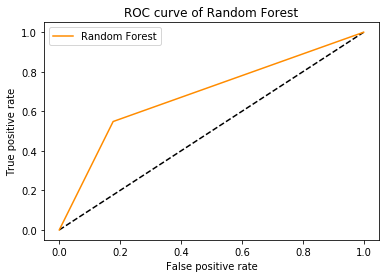

In [13]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from matplotlib import pyplot as plt
false_positive, true_positive, _ = roc_curve(y_test, y_pred)

plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_positive, true_positive, color='darkorange', label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of Random Forest')
plt.legend(loc='best')
plt.show()

With a model taking in fewer variables, we were able to get roughly similar accuracy.

One of the reasons I picked the features as I did is to avoid correlations among features such as insulin and glucose.

# Conclusion and Recommendation

## Conclusion

We should be able to predict whether a person will have diabetes as some of the features (input) suggest a reasonable degree of correlation (0.3 to 0.7) with the output variable -- the occurence of diabetes.

Hence, making predictions relating to diabetes occurance is a possibility and the model selected is very important. In this case, we ran the test against both Artificial Neural Network and Random Forest and it seems that random forest is much better in making the prediction.

## Recommendation and Next Step

1. Predicting to see if folks may get diabetes is possible and therefore we should go ahead and build a model
2. We should test a few other models to figure out which one may be a good fit for prediction. In addition, we should vary the models that we built to see if parameter tuning can help with increased accuracy.

a. Ideally we'd like to get models that has higher accuracy and we should strive to get as low of false negatives as possible (folks who may get diabetes but we predicted them as no).

b. Corrollary: It is better to have false positive as opposed to false negative

c. To tune the model, we should vary the hyper parameters as well as loss functions so that we can pick out the optimal model.

3. We need to productionalize the data and see how the model does against production data. One of the ways we can introduce bias rendering our model ineffective is the way we sampled the data to be used for training.
4. Once we build a model and if it is deemed accurate/performant against prod data, we should use unsupervised machine learning techniques to cluster and understand why someone maybe predicted to have diabetes.
5. With that, we can figure out what product improvements / new products we can make in order to help folks pay attention to their increased risk of getting diabetes
6. We can then build a UI to recommend folks what course of actions to take to prevent diabetes

# To productionalize

One of the ways we can productionalize the model is to deploy to a hosting service such as AWS. There are couple ways to do this:

1. We can deploy to AWS Cloudformation and have Airflow jobs to trigger the run to generate results.
2. We can also deploy this to AWS Sagemaker and expose API endpoint.

I have written about how to do this here:

-- Blog: https://medium.com/@richardchen_81235/custom-keras-model-in-sagemaker-277a2831ac67

-- Code: https://github.com/rca241231/sagemaker_example